# Import Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

# Load Data

In [2]:
df=pd.read_csv('HRSalary.csv')

In [3]:
df

,Name,Age,Year Of Experince,Current Salary
0,NQUGN,49,4.0,761802
1,XVIHL,24,23.0,451401
2,NFYDE,54,33.0,757178
3,HUFRV,30,15.0,266478
4,WJHTF,37,17.0,528760
...,...,...,...,...
199995,RDPOJ,59,9.0,228417
199996,GSZZF,35,38.0,683210
199997,WVGKG,56,2.0,158125
199998,XZRYP,23,34.0,863819


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               200000 non-null  object 
 1   Age                200000 non-null  int64  
 2   Year Of Experince  199999 non-null  float64
 3   Current Salary     200000 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 6.1+ MB


# Chek null value is present or not

In [5]:
df.isnull().sum()

Name                 0
Age                  0
Year Of Experince    1
Current Salary       0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

Name                 0
Age                  0
Year Of Experince    0
Current Salary       0
dtype: int64

In [8]:
df.describe()

,Age,Year Of Experince,Current Salary
count,199999.000000,199999.000000,199999.000000
mean,39.983585,20.491127,510841.180681
std,11.824440,11.535613,283070.834586
min,0.000000,1.000000,20005.000000
25%,30.000000,10.000000,266102.000000
50%,40.000000,20.000000,510757.000000
75%,50.000000,30.000000,756292.000000
max,60.000000,40.000000,999998.000000


In [9]:
df.drop(columns=df.columns[0], 
        axis=1, 
        inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
df

,Age,Year Of Experince,Current Salary
0,49,4.0,761802
1,24,23.0,451401
2,54,33.0,757178
3,30,15.0,266478
4,37,17.0,528760
...,...,...,...
199995,59,9.0,228417
199996,35,38.0,683210
199997,56,2.0,158125
199998,23,34.0,863819


# visualisation

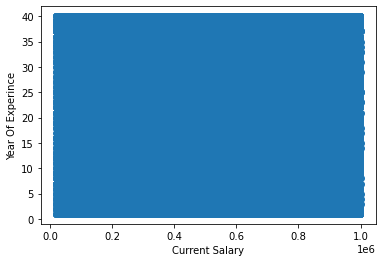

In [11]:
plt.scatter( df['Current Salary'],df['Year Of Experince'])
plt.xlabel('Current Salary')
plt.ylabel('Year Of Experince')
 
plt.show()

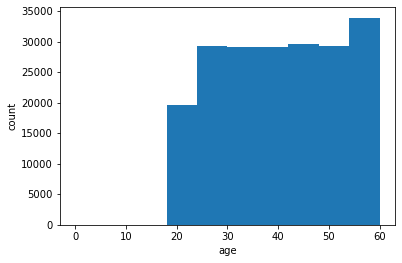

In [12]:
plt.hist(df['Age'])
plt.xlabel('age')
plt.ylabel('count')
plt.show()

# Prepare data

In [13]:
X = df.drop('Current Salary',axis=1)
y = df['Current Salary']

In [14]:
X.shape , y.shape

((199999, 2), (199999,))

# Split data into train and test

In [15]:
X_train , X_test , Y_train , Y_test = train_test_split(X,y,random_state=101,test_size=0.2)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((159999, 2), (40000, 2), (159999,), (40000,))

# Define LinearRegression Model

In [16]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [17]:
pred = lr.predict(X_test)
pred

array([510095.00449942, 511940.66916911, 509151.39786792, ...,
       511146.85097868, 510117.17561059, 509639.87399728])

In [18]:
Y_test

13588     387267
29803     853882
138264    326504
82856     859909
162747     25914
           ...  
136842    690305
116769    114370
130576    537499
31104     399643
97790     962163
Name: Current Salary, Length: 40000, dtype: int64

In [19]:
diff = Y_test - pred

In [20]:
pd.DataFrame(np.c_[Y_test , pred , diff] , columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,387267.0,510095.004499,-122828.004499
1,853882.0,511940.669169,341941.330831
2,326504.0,509151.397868,-182647.397868
3,859909.0,509007.018764,350901.981236
4,25914.0,512567.937144,-486653.937144
...,...,...,...
39995,690305.0,511763.122359,178541.877641
39996,114370.0,513483.785407,-399113.785407
39997,537499.0,511146.850979,26352.149021
39998,399643.0,510117.175611,-110474.175611


# Evaluate

In [22]:
lr.score(X_test , Y_test)

-0.00011103313217963873

In [23]:
rmse = np.sqrt(mean_squared_error(Y_test,pred))
r2 = r2_score(Y_test,pred)

In [24]:
rmse , r2

(283514.74825479777, -0.00011103313217963873)